### Version info

In [1]:
#Import relevant libraries and define settings for plotting.
%matplotlib inline
import sys
print(sys.version)

import numpy as np
print('Numpy version:', np.__version__)

import pandas as pd
print('Pandas version:', pd.__version__)

import matplotlib as mpl
import matplotlib.pyplot as plt
print('Matplotlib version:', mpl.__version__)

import seaborn as sns
print('Seaborn version:', sns.__version__)

import datetime
import time
import multiprocessing as mp
import psutil

3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy version: 1.16.5
Pandas version: 0.25.1
Matplotlib version: 3.1.1
Seaborn version: 0.9.0


In [3]:
# Check the number of cores and memory usage
num_cores = mp.cpu_count()
print("This kernel has ",num_cores,"cores and you can find the information regarding the memory usage:",psutil.virtual_memory())

This kernel has  8 cores and you can find the information regarding the memory usage: svmem(total=8367099904, available=2451128320, percent=70.7, used=5915971584, free=2451128320)


# Hypothesis 
# Metropolitan areas of NYC have higher tipping rates considering the income level of the people living in these areas.
# 1a: Finding out the relationship between tipping rates with the Pick up and Drop off locations. 
# 1b: Determining the most popular pick up and drop off locations in NYC.
# 1c: Analyzing if there's a correlation between tipping rates and the weekdays.

### Reading the NYC Uber Data

In [5]:
df_uber = pd.read_csv('C:/Users/dipik/Untitled Folder/uber_nyc_data.csv')

In [6]:
df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17


### Reading the Yellow Cab Service NYC data for Jan 2019

In [7]:
df_yellowcab_2019 = pd.read_csv('C:/Users/dipik/Untitled Folder/yellow_tripdata_2019-01.csv')

In [8]:
df_yellowcab_2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


### Reading the Yellow Cab Service NYC data for Jan 2018

In [9]:
df_yellowcab_2018 = pd.read_csv('C:/Users/dipik/Untitled Folder/yellow_tripdata_2018-01.csv')

In [10]:
df_yellowcab_2018.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [11]:
len(df_yellowcab_2018.VendorID.unique())

2

### Reading the Taxi Zone Lookup File 

In [12]:
df_taxi_zone_lookup = pd.read_csv('C:/Users/dipik/Untitled Folder/taxi+_zone_lookup.csv')

In [13]:
df_taxi_zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


### Reading the Yellow Cab Service NYC data for Jan 2017

In [14]:
df_yellowcab_2017 = pd.read_csv('C:/Users/dipik/Untitled Folder/yellow_tripdata_2017-01.csv')

In [15]:
df_yellowcab_2017.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


### Reading the FHV NYC data (Uber, Lyft, etc) for Jan 2017

In [16]:
df_fhv_2017 = pd.read_csv('C:/Users/dipik/Untitled Folder/fhv_tripdata_2017-01.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df_fhv_2017.head()

,Dispatching_base_num,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID
0,B00001,2017-01-01 00:30:00,NaN,NaN,NaN
1,B00001,2017-01-01 00:30:00,NaN,NaN,NaN
2,B00008,2017-01-01 00:50:00,NaN,NaN,NaN
3,B00009,2017-01-01 00:10:00,NaN,NaN,NaN
4,B00009,2017-01-01 00:50:00,NaN,NaN,NaN


### Check for missing or possibly erroneous data.

In [18]:
#Performing all the preprocessing and data cleaning on all the imported data sets
#This takes a while to run
print("NUMBER OF DUPLICATES FOR EACH DATA SET >>>>>>>>>>")
print("Yellow cabs in 2017: ")
print(len(df_yellowcab_2017[df_yellowcab_2017.duplicated() == True]))
print("Yellow cabs in 2018: ")
print(len(df_yellowcab_2018[df_yellowcab_2018.duplicated() == True]))
print("Yellow cabs in 2019: ")
print(len(df_yellowcab_2019[df_yellowcab_2019.duplicated() == True]))
print("FHV cabs in 2017: ")
print(len(df_fhv_2017[df_fhv_2017.duplicated() == True]))
print("Taxi Zone Lookup: ")
print(len(df_taxi_zone_lookup[df_taxi_zone_lookup.duplicated() == True]))
print("Uber data: ")
print(len(df_uber[df_uber.duplicated() == True]))

NUMBER OF DUPLICATES FOR EACH DATA SET >>>>>>>>>>
Yellow cabs in 2017: 
0
Yellow cabs in 2018: 
1
Yellow cabs in 2019: 
0
FHV cabs in 2017: 
1078790
Taxi Zone Lookup: 
0
Uber data: 
0


### Handling the duplicate rows from each data set

In [19]:
#Creating copies of each of the data sets
copy_df_yellowcab_2017 = df_yellowcab_2017
copy_df_yellowcab_2018 = df_yellowcab_2018
copy_df_yellowcab_2019 = df_yellowcab_2019
copy_df_fhv_2017 = df_fhv_2017
copy_df_taxi_zone_lookup = df_taxi_zone_lookup
copy_df_uber = df_uber

#Since there are some files with duplicate values, we need to eliminate them.
#Eliminating duplicates from the Yellow cabs in 2018
copy_df_yellowcab_2018.drop_duplicates(inplace = True) 
copy_df_yellowcab_2018.head()

#Eliminating duplicates from the FHV cabs in 2017
copy_df_fhv_2017.drop_duplicates(inplace = True) 
copy_df_fhv_2017.head()

print("Checking for duplicates again!")
print("Yellow cabs in 2018: ")
print(len(copy_df_yellowcab_2018[copy_df_yellowcab_2018.duplicated() == True]))

Checking for duplicates again!
Yellow cabs in 2018: 
0


### Finding and displaying the total null values in each of the datasets 

In [21]:
print("Total null values per column in the Yellow cabs 2017 data: ")
print(copy_df_yellowcab_2017.isnull().sum()) 
print("Total null values per column in the Yellow cabs 2018 data: ")
print(copy_df_yellowcab_2018.isnull().sum()) 
print("Total null values per column in the Yellow cabs 2019 data: ")
print(copy_df_yellowcab_2019.isnull().sum()) 
print("Total null values per column in the FHV cabs 2017 data: ")
print(copy_df_fhv_2017.isnull().sum()) 

Total null values per column in the Yellow cabs 2017 data: 
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
Total null values per column in the Yellow cabs 2018 data: 
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
imp

### Handling missing data and null values in each of the data sets. 

In [22]:
#Finding out records that have both PU location and DO location missing
dftest1 = copy_df_fhv_2017[copy_df_fhv_2017.PUlocationID.isnull() & copy_df_fhv_2017.DOlocationID.isnull()]

In [23]:
#Dropping common rows in both the data frames
#basically getting rid of rows that won't be of any use in the first hypothesis
#always work on the copy of the original dataframes to avoid data loss
df_fhv_2017_hypo1 = copy_df_fhv_2017
df_fhv_2017_hypo1.head()

x = pd.merge(df_fhv_2017_hypo1,dftest1, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [24]:
print("Length before handling missing PU and DO locations: ")
print("FHV data 2017")
print(len(copy_df_fhv_2017))
print("Length after handling missing PU and DO locations: ")
print("FHV data 2017")
print(len(x))

Length before handling missing PU and DO locations: 
FHV data 2017
12578422
Length after handling missing PU and DO locations: 
FHV data 2017
9923352


### Merging each of the Yellow Taxi files with the Zone Location file 

In [25]:
copy_df_yellowcab_2019 = df_yellowcab_2019
copy_df_taxi_zone_lookup = df_taxi_zone_lookup
def leftmergeOnPU(ds1, ds2):
    merged= pd.merge(ds1, ds2, left_on='PULocationID', right_on='LocationID', how='left')
    return merged

In [26]:
#Merging all yellow cab data for 2017
yellow_merged2017 = leftmergeOnPU(copy_df_yellowcab_2017, copy_df_taxi_zone_lookup)
yellow_merged2017.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,LocationID,Borough,Zone,service_zone
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,...,0.0,0.5,2.00,0.0,0.3,15.30,263,Manhattan,Yorkville West,Yellow Zone
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,...,0.0,0.5,1.45,0.0,0.3,7.25,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,...,0.0,0.5,1.00,0.0,0.3,7.30,164,Manhattan,Midtown South,Yellow Zone
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,...,0.0,0.5,1.70,0.0,0.3,8.50,236,Manhattan,Upper East Side North,Yellow Zone
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,...,0.0,0.5,0.00,0.0,0.3,52.80,249,Manhattan,West Village,Yellow Zone


In [27]:
#Merging all yellow cab data for 2018
yellow_merged2018 = leftmergeOnPU(copy_df_yellowcab_2018, copy_df_taxi_zone_lookup)
yellow_merged2018.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,LocationID,Borough,Zone,service_zone
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,...,0.5,0.5,0.00,0.0,0.3,5.80,41,Manhattan,Central Harlem,Boro Zone
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,...,0.5,0.5,0.00,0.0,0.3,15.30,239,Manhattan,Upper West Side South,Yellow Zone
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,...,0.5,0.5,1.00,0.0,0.3,8.30,262,Manhattan,Yorkville East,Yellow Zone
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,...,0.5,0.5,0.00,0.0,0.3,34.80,140,Manhattan,Lenox Hill East,Yellow Zone
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,...,0.5,0.5,2.75,0.0,0.3,16.55,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone


In [33]:
#Merging all yellow cab data for 2019
yellow_merged2019 = leftmergeOnPU(copy_df_yellowcab_2019, copy_df_taxi_zone_lookup)
yellow_merged2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,LocationID,Borough,Zone,service_zone
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,0.5,1.65,0.0,0.3,9.95,NaN,151,Manhattan,Manhattan Valley,Yellow Zone
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,0.5,1.00,0.0,0.3,16.30,NaN,239,Manhattan,Upper West Side South,Yellow Zone
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,...,0.5,0.00,0.0,0.3,5.80,NaN,236,Manhattan,Upper East Side North,Yellow Zone
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,...,0.5,0.00,0.0,0.3,7.55,NaN,193,Queens,Queensbridge/Ravenswood,Boro Zone
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,...,0.5,0.00,0.0,0.3,55.55,NaN,193,Queens,Queensbridge/Ravenswood,Boro Zone


In [34]:
def leftmergeOnDO(ds1, ds2):
    merged= pd.merge(ds1, ds2, left_on='DOLocationID', right_on='LocationID', how='left')
    return merged

In [35]:
#Merging all yellow cab data for 2019 according to the drop off Location IDs
yellow_merged_DO_2019 = leftmergeOnDO(copy_df_yellowcab_2019, copy_df_taxi_zone_lookup)
yellow_merged_DO_2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,LocationID,Borough,Zone,service_zone
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,0.5,1.65,0.0,0.3,9.95,NaN,239,Manhattan,Upper West Side South,Yellow Zone
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,0.5,1.00,0.0,0.3,16.30,NaN,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,...,0.5,0.00,0.0,0.3,5.80,NaN,236,Manhattan,Upper East Side North,Yellow Zone
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,...,0.5,0.00,0.0,0.3,7.55,NaN,193,Queens,Queensbridge/Ravenswood,Boro Zone
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,...,0.5,0.00,0.0,0.3,55.55,NaN,193,Queens,Queensbridge/Ravenswood,Boro Zone


### Merging each of the FHV Taxi files with the Zone Location file

In [36]:
def leftmergeOnPU_FHV(ds1, ds2):
    merged= pd.merge(ds1, ds2, left_on='PUlocationID', right_on='LocationID', how='left')
    return merged

In [37]:
#Merging all FHV cab data for 2017
fhv_merged2017 = leftmergeOnPU_FHV(x, copy_df_taxi_zone_lookup)
fhv_merged2017.head()

,Dispatching_base_num,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,LocationID,Borough,Zone,service_zone
0,B00029,2017-01-01 00:56:00,NaN,174.0,NaN,174.0,Bronx,Norwood,Boro Zone
1,B00029,2017-01-01 00:01:00,NaN,3.0,NaN,3.0,Bronx,Allerton/Pelham Gardens,Boro Zone
2,B00029,2017-01-01 00:16:00,NaN,51.0,NaN,51.0,Bronx,Co-Op City,Boro Zone
3,B00029,2017-01-01 00:22:00,NaN,3.0,NaN,3.0,Bronx,Allerton/Pelham Gardens,Boro Zone
4,B00029,2017-01-01 00:46:00,NaN,185.0,NaN,185.0,Bronx,Pelham Parkway,Boro Zone


### Visualizing the most popular pick up and drop off location IDs for Yellow cab service data

In [102]:
avg_tip_per_location_PU = yellow_merged2019[['PULocationID','DOLocationID','tip_amount','Zone']]
avg_tip_per_location_PU.groupby(avg_tip_per_location.PULocationID)[["tip_amount"]].mean()

,tip_amount
PULocationID,
1,12.018094
2,4.308000
3,0.099600
4,1.470986
5,3.864000
...,...
261,2.186298
262,1.509759
263,1.414156


In [103]:
avg_tip_per_location_DO = yellow_merged2019[['PULocationID','DOLocationID','tip_amount','Zone']]
avg_tip_per_location_DO.groupby(avg_tip_per_location.DOLocationID)[["tip_amount"]].mean()

,tip_amount
DOLocationID,
1,11.606594
2,1.827857
3,1.992987
4,1.522369
5,5.329000
...,...
261,2.615452
262,1.692977
263,1.606904


In [104]:
show_top_30PU = avg_tip_per_location_PU.nlargest(30,'tip_amount')
show_top_30PU

,PULocationID,DOLocationID,tip_amount,Zone
1072435,239,24,787.25,Upper West Side South
5739329,116,142,444.80,Hamilton Heights
1083686,226,28,421.00,Sunnyside
393023,133,133,400.00,Kensington
1254510,50,142,333.33,Clinton West
4634547,233,229,300.00,UN/Turtle Bay South
3431836,264,45,296.70,NV
5282994,68,265,260.00,East Chelsea
1925890,265,265,246.00,NaN
2292784,249,107,222.22,West Village


In [90]:
show_top_30DO = avg_tip_per_location_DO.nlargest(30,'tip_amount')
show_top_30DO

,PULocationID,DOLocationID,tip_amount
1072435,239,24,787.25
5739329,116,142,444.80
1083686,226,28,421.00
393023,133,133,400.00
1254510,50,142,333.33
4634547,233,229,300.00
3431836,264,45,296.70
5282994,68,265,260.00
1925890,265,265,246.00
2292784,249,107,222.22


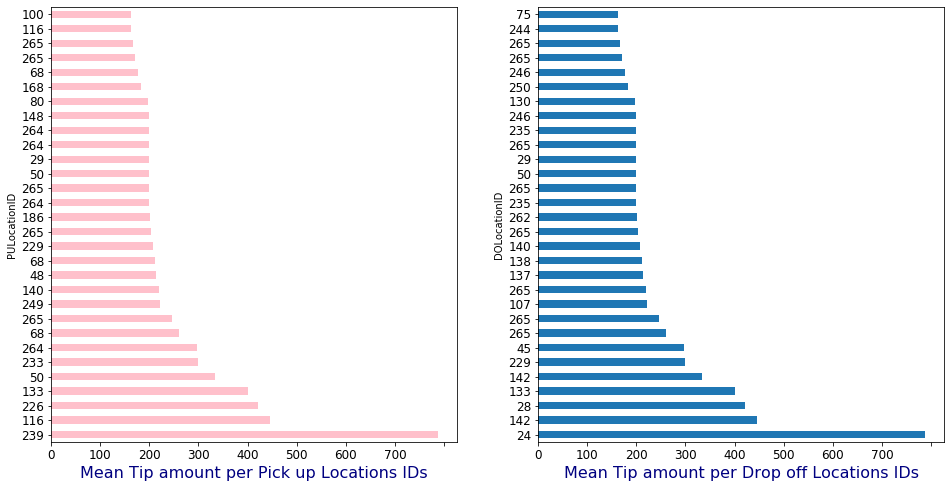

In [105]:
fig = plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
temp = show_top_30PU.tip_amount
#temp = yellow_merged2019.tip_amount.value_counts()
ax1 = temp[:30].plot(kind = 'barh', color = 'pink')
ax1.set_xlabel('tip_amount')
ax1.set_ylabel('PULocationID')
ax1.set_xticklabels(['0', '100', '200', '300', '400', '500', '600', '700'])
ax1.set_yticklabels(show_top_30PU.PULocationID, rotation=0)
#ax1.set_yticklabels('PULocationID')
plt.tick_params(labelsize=12)
plt.xlabel('Mean Tip amount per Pick up Locations IDs', fontsize = 16, color='navy')

plt.subplot(1,2,2) 
temp2 = show_top_30DO.tip_amount
#temp2 = yellow_merged2019.DOLocationID.value_counts()
ax2 = temp2[:30].plot(kind = 'barh')
ax2.set_xlabel('tip_amount')
ax2.set_ylabel('DOLocationID')
ax2.set_xticklabels(['0', '100', '200', '300', '400', '500', '600', '700'])
ax2.set_yticklabels(show_top_30PU.DOLocationID, rotation=0)
plt.tick_params(labelsize=12)
plt.xlabel('Mean Tip amount per Drop off Locations IDs', fontsize = 16, color='navy')

plt.show()

### Visulaizing the most popular pick up and drop off locations (Boroughs) for Yellow cab service data

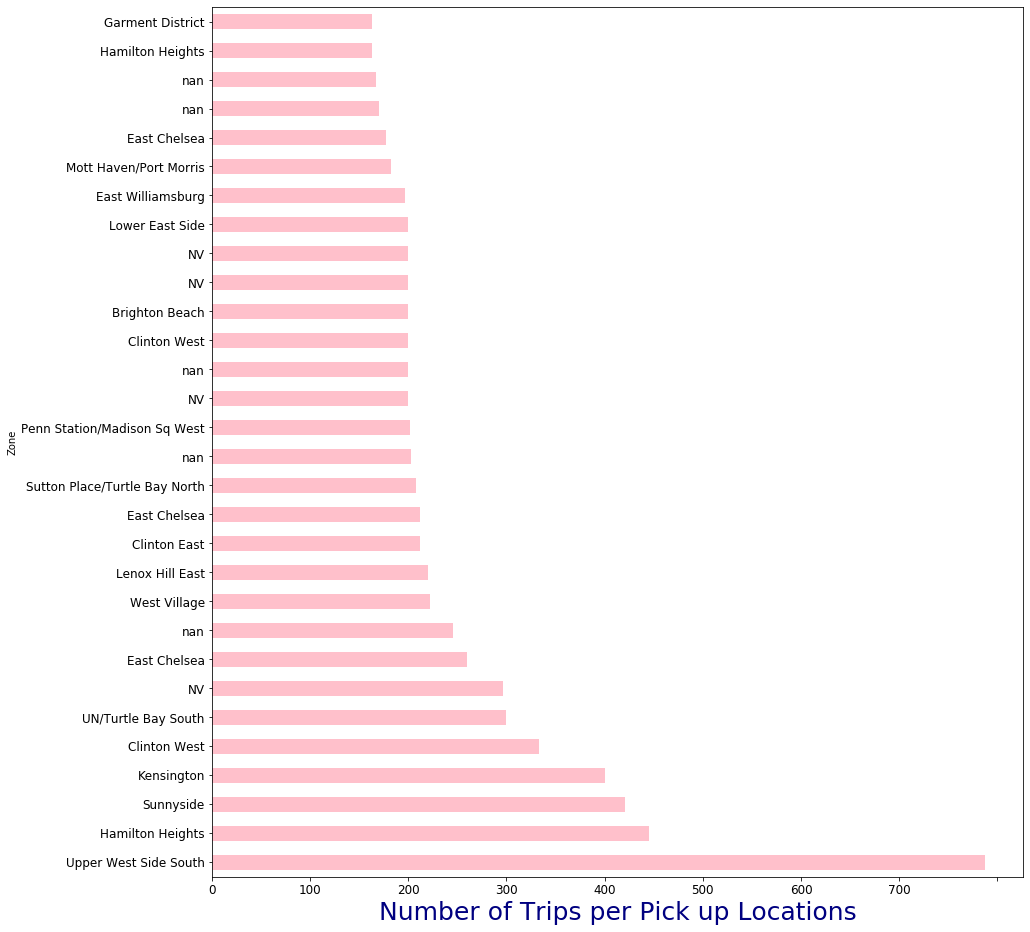

In [106]:
#Visulaizing the most popular pick up and drop off locations for Yellow cab service data
fig = plt.figure(figsize = (32,16))

plt.subplot(1,2,1)
#temp = yellow_merged2019.Zone.value_counts()
temp = show_top_30PU.tip_amount
ax1 = temp[:30].plot(kind = 'barh', color = 'pink')
ax1.set_xlabel('tip_amount')
ax1.set_ylabel('Zone')
ax1.set_xticklabels(['0', '100', '200', '300', '400', '500', '600', '700'])
ax1.set_yticklabels(show_top_30PU.Zone, rotation=0)
plt.tick_params(labelsize=12)
plt.xlabel('Number of Trips per Pick up Locations', fontsize = 25, color='navy')


# plt.subplot(1,2,2) #note: it won't account missing values (4% of data)
# temp2 = yellow_merged_DO_2019.Zone.value_counts()
# ax2 = temp2[:10].plot(kind = 'barh')
# ax2.set_xticklabels(['0', '1M', '2M', '3M', '4M', '5M', '6M'])
# plt.tick_params(labelsize=12)
# plt.xlabel('Number of Trips per Drop off Locations', fontsize = 25, color='navy')

plt.show()

### Parse the pickup_datetime column to datetime type and create related features.

In [40]:
#Finding out how many pickup time data offer minutes or seconds precision
len(copy_df_yellowcab_2019[copy_df_yellowcab_2019.tpep_pickup_datetime.apply(lambda x: x[-5:] == '00:00') == False])

7665650

In [41]:
#Finding out how many pickup time data offer minutes or seconds precision
len(copy_df_yellowcab_2019[copy_df_yellowcab_2019.tpep_dropoff_datetime.apply(lambda x: x[-5:] == '00:00') == False])

7664093

In [42]:
def dateParser(s):
    """
    Function that takes a string in the format yyyy-mm-dd hh:mm:ss, and
    returns the same as a datetime object.
    """
    return datetime.datetime(int(s[0:4]), int(s[5:7]), int(s[8:10]), int(s[11:13]))


In [43]:
#Apply parser to pick up data
t0 = time.time()
copy_df_yellowcab_2019['pu_date_hour_PU'] = copy_df_yellowcab_2019.tpep_pickup_datetime.apply(dateParser)
time.time() - t0

9.651105165481567

In [44]:
#Apply parser to drop off data
t0 = time.time()
copy_df_yellowcab_2019['pu_date_hour_DO'] = copy_df_yellowcab_2019.tpep_dropoff_datetime.apply(dateParser)
time.time() - t0

10.227874994277954

In [45]:
beginning = copy_df_yellowcab_2019.pu_date_hour_DO.min()
end = copy_df_yellowcab_2019.pu_date_hour_DO.max()
print(beginning, end, end - beginning)

2001-02-02 15:00:00 2088-01-24 07:00:00 31766 days 16:00:00


In [46]:
beginning = copy_df_yellowcab_2019.pu_date_hour_PU.min()
end = copy_df_yellowcab_2019.pu_date_hour_PU.max()
print(beginning, end, end - beginning)

2001-02-02 14:00:00 2088-01-24 00:00:00 31766 days 10:00:00


### Create other date and time features.

In [47]:
t0 = time.time()
copy_df_yellowcab_2019['pu_date_PU'] = pd.Series(map(lambda x: x.astype('datetime64[D]'), copy_df_yellowcab_2019['pu_date_hour_PU'].values))
time.time() - t0

12.17830753326416

In [48]:
#Create a column with the DO date, without the time. This will be useful later.
t0 = time.time()
copy_df_yellowcab_2019['pu_date_DO'] = pd.Series(map(lambda x: x.astype('datetime64[D]'), copy_df_yellowcab_2019['pu_date_hour_DO'].values))
time.time() - t0

12.469516038894653

In [49]:
#Get month and year from pick up timestamp
copy_df_yellowcab_2019['year_PU'] = copy_df_yellowcab_2019['pu_date_hour_PU'].dt.year
copy_df_yellowcab_2019['month_PU'] = copy_df_yellowcab_2019['pu_date_hour_PU'].dt.month
copy_df_yellowcab_2019['year_DO'] = copy_df_yellowcab_2019['pu_date_hour_DO'].dt.year
copy_df_yellowcab_2019['month_DO'] = copy_df_yellowcab_2019['pu_date_hour_DO'].dt.month

In [50]:
#Get trip pick up day of the month
t0 = time.time()
copy_df_yellowcab_2019['day'] = copy_df_yellowcab_2019['pu_date_hour_PU'].dt.day #.apply(lambda x: x.day) = 105 seconds vs < 2 seconds with dt
time.time() - t0

0.4697437286376953

In [51]:
#Get trip pick up hour from timestamp
t0 = time.time()
copy_df_yellowcab_2019['hour_PU'] = copy_df_yellowcab_2019['pu_date_hour_PU'].dt.hour #< 2 seconds vs 101 seconds using apply lambda
time.time() - t0

0.4747283458709717

In [52]:
#Get trip drop off hour from timestamp
t0 = time.time()
copy_df_yellowcab_2019['hour_DO'] = copy_df_yellowcab_2019['pu_date_hour_DO'].dt.hour #< 2 seconds vs 101 seconds using apply lambda
time.time() - t0

0.4916846752166748

In [53]:
#Get trip pick up weekday from timestamp
t0 = time.time()
copy_df_yellowcab_2019['weekday'] = copy_df_yellowcab_2019['pu_date_hour_PU'].dt.dayofweek
time.time() - t0

0.4921095371246338

In [54]:
copy_df_yellowcab_2019.weekday.value_counts() #Monday = 0, Sunday = 6

3    1351516
2    1259695
1    1203843
4    1082795
5    1007797
0     904512
6     857634
Name: weekday, dtype: int64

In [55]:
copy_df_yellowcab_2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pu_date_PU,pu_date_DO,year_PU,month_PU,year_DO,month_DO,day,hour_PU,hour_DO,weekday
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,2019-01-01,2019-01-01,2019,1,2019,1,1,0,0,1
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,2019-01-01,2019-01-01,2019,1,2019,1,1,0,1,1
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,...,2018-12-21,2018-12-21,2018,12,2018,12,21,13,13,4
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,...,2018-11-28,2018-11-28,2018,11,2018,11,28,15,15,2
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,...,2018-11-28,2018-11-28,2018,11,2018,11,28,15,15,2


### Analyzing if there's a correlation between tipping rates and the weekdays.

In [56]:
#Define robust function to automatically add annotated labels on bar plots.
#Inspiration from http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

def annotate_labels(ax, labels_list, **kwargs):
    """
    Function to automatically add labels on bar charts.
    It takes a plot axis, an ordered list of labels, and text kwargs.
    """
    
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    rects = ax.patches

    for rect, label in zip(rects, labels_list):
        height = rect.get_height()
        p_height = (height / y_height) # Fraction of axis height taken up by this rectangle
        label_position = height + (y_height * 0.01)
        
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column (or else, change ylim)
        #if p_height > 0.95:
        #    label_position = height - (y_height * 0.05)
        #else:
        #    label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position, label, kwargs)
    return None

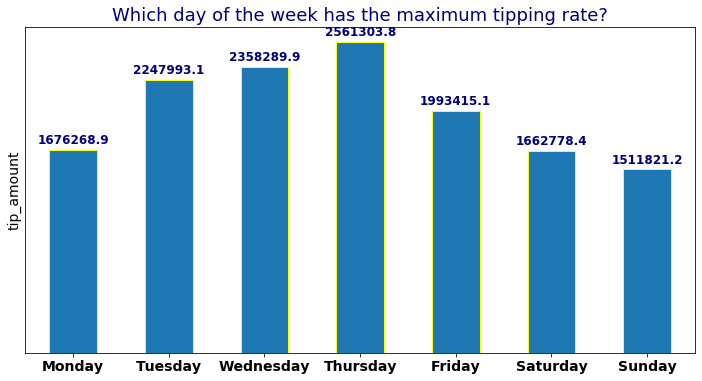

In [57]:
#Create plot. Does Saturday have better traffic flow than Monday?
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_plt2 = copy_df_yellowcab_2019.groupby('weekday')['tip_amount'].sum()
fig = plt.figure()
labels_list = df_plt2.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt2.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
ax.set_xticklabels(weekday_labels, weight='bold')
#ax.set_axis_bgcolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('tip_amount', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which day of the week has the maximum tipping rate?', fontsize = 18, color='navy')
plt.show()

In [58]:
yellow_merged2019.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,LocationID,Borough,Zone,service_zone
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,0.5,1.65,0.0,0.3,9.95,NaN,151,Manhattan,Manhattan Valley,Yellow Zone
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,0.5,1.00,0.0,0.3,16.30,NaN,239,Manhattan,Upper West Side South,Yellow Zone
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,...,0.5,0.00,0.0,0.3,5.80,NaN,236,Manhattan,Upper East Side North,Yellow Zone
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,...,0.5,0.00,0.0,0.3,7.55,NaN,193,Queens,Queensbridge/Ravenswood,Boro Zone
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,...,0.5,0.00,0.0,0.3,55.55,NaN,193,Queens,Queensbridge/Ravenswood,Boro Zone


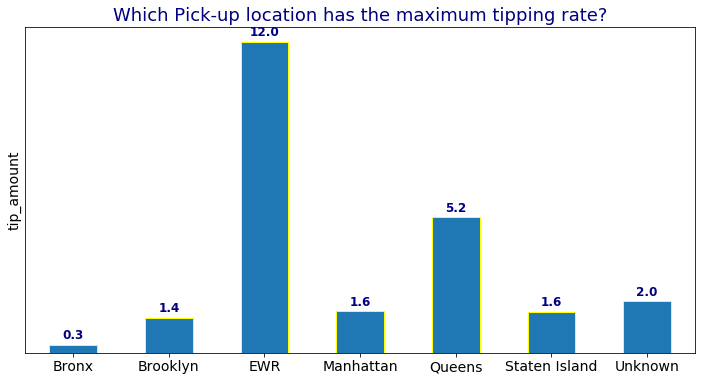

In [107]:
#borough_list = yellow_merged2019.[]
df_plt2 = yellow_merged2019.groupby('Borough')['tip_amount'].mean()
fig = plt.figure()
labels_list = df_plt2.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt2.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
#ax.set_xticklabels(borough_list, weight='bold')
#ax.set_axis_bgcolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('tip_amount', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which Pick-up location has the maximum tipping rate?', fontsize = 18, color='navy')
plt.show()

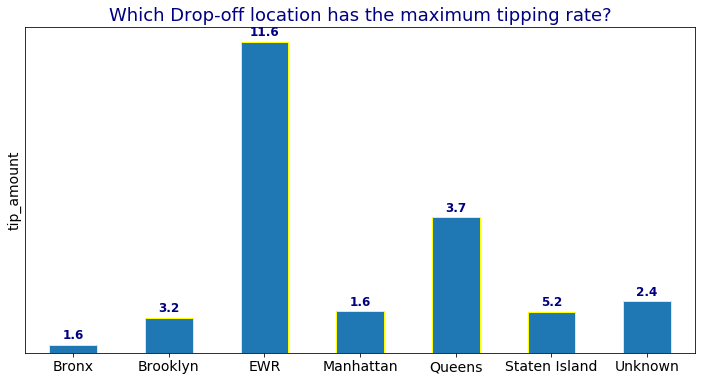

In [108]:
#borough_list = yellow_merged2019.[]
df_plt3 = yellow_merged_DO_2019.groupby('Borough')['tip_amount'].mean()
fig = plt.figure()
labels_list = df_plt3.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt2.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.xlabel('')
plt.ylabel('tip_amount', fontsize = 14)
plt.tick_params(labelsize=14)
plt.title('Which Drop-off location has the maximum tipping rate?', fontsize = 18, color='navy')
plt.show()

## Uber NYC data set analysis 

## Hypothesis 2

## 2 a: Visualizing the demand: number of Uber trips per day.

## 2 b: The effect of time on demand for Uber rides: distribution per month(Peak hours                          versus Off-Peak hours)

##  2 c: Month over Month Base Revenue Growth: how fast has Uber grown in the period?

## 2 d: Cummulative Revenue Growth Percentage from September 2014

In [53]:
copy_df_uber.info() #near 31 million entries, ~1.4GB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
id                 int64
origin_taz         object
destination_taz    object
pickup_datetime    object
trip_distance      float64
trip_duration      object
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


In [54]:
copy_df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17


In [55]:
#The ID is unique
len(copy_df_uber.id.unique())

30925738

## Looking for missing or possibly erroneous data in Uber NYC Data Frame

In [56]:
#Calculate the duplicated rows (this takes a while to run): 0 rows
len(copy_df_uber[copy_df_uber.duplicated() == True])

0

~1.3 million destination entries (4%) are null (missing) for the below calculation

In [57]:
#Show total null values per column. 
copy_df_uber.isnull().sum() 

id                       0
origin_taz               0
destination_taz    1273023
pickup_datetime          0
trip_distance           38
trip_duration           38
dtype: int64

In [58]:
arr_of_origin_unique = copy_df_uber.origin_taz.unique() #28 unique origin codes
arr_of_origin_unique

array(['7C', '7B', '11', '3B', '2A', '5B', '10', '2B', '9', '6B', '15',
       '4C', '5A', '8', '14', '4A', '7A', '1', '16', '3A', '2C', '6A',
       '12', '13', '3C', '4B', '5C', '17'], dtype=object)

In [59]:
arr_of_dest_unique = copy_df_uber.destination_taz.unique() #30 unique destination codes
arr_of_dest_unique

array(['6A', '15', '2A', '4A', '10', '4C', '7A', '3C', '5B', '14', '8',
       nan, '7C', '12', '2C', '1', '6B', '5C', '9', '3A', '2B', '11',
       '7B', '5A', '13', '4B', '18', '16', '3B', '17'], dtype=object)

#Checking if some of the data are present with missing destination. 
#If there is such data, one solution to fill missing values would be predict destination based on the other features that we do later.

In [60]:
copy_df_uber[copy_df_uber.destination_taz.isnull()].head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15,252596,6B,NaN,2014-09-01 17:00:00,11.67,0:23:45
32,252613,9,NaN,2014-09-01 16:00:00,80.69,1:59:37
63,252644,9,NaN,2014-09-01 18:00:00,23.07,1:03:37
141,252722,9,NaN,2014-09-01 10:00:00,21.73,0:41:12
148,252729,4B,NaN,2014-09-01 10:00:00,4.62,0:14:55


Check if there are records where values are present for the destination while has missing values for trip distance and duration
#There are 38 records of this sort.

In [61]:
df_Trip_dist_dur_null = copy_df_uber[copy_df_uber.trip_duration.isnull() & copy_df_uber.trip_distance.isnull()]
df_Trip_dist_dur_null.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15155317,39535,2A,11,2015-04-25 12:00:00,NaN,NaN
15245057,1009076,2A,2A,2015-04-26 01:00:00,NaN,NaN
16519652,15028665,2A,7C,2015-04-29 21:00:00,NaN,NaN
17148253,22250173,2A,2A,2015-04-12 02:00:00,NaN,NaN
17297563,23716998,2C,11,2015-04-25 13:00:00,NaN,NaN


Check for cases where trip_duration is null match the cases for which trip_distance is also null:
For our data there are zero results. 

In [62]:
len(copy_df_uber[(copy_df_uber.trip_duration.isnull() == False) & (copy_df_uber.trip_distance.isnull())])

0

## Apply the date parser to the Uber NYC Data and create related features.

Use the Date parser function already defined for other data processing
Calculate the "pickUp_date_hour" column values and add it to the data frame for later operations. 

In [63]:
t = time.time()
copy_df_uber['pickUp_date_hour'] = copy_df_uber.pickup_datetime.apply(dateParser)
time.time() - t

99.29777145385742

Define exactly one year(365 days) span with specifying begining and end date from the entire data set.

In [64]:
beginning_dt = copy_df_uber.pickUp_date_hour.min()
end_dt = copy_df_uber.pickUp_date_hour.max()
print (beginning_dt, end_dt, end_dt-beginning_dt)

2014-09-01 00:00:00 2015-09-01 00:00:00 365 days 00:00:00


In [65]:
#Get all federal holidays in this period
from pandas.tseries.holiday import USFederalHolidayCalendar

#when return_name is True, then name is series value and date is the series index, otherwise date is series value.
holiday_list = USFederalHolidayCalendar().holidays(beginning_dt, end_dt, return_name = True) 
holiday_list

2014-09-01                     Labor Day
2014-10-13                  Columbus Day
2014-11-11                  Veterans Day
2014-11-27                  Thanksgiving
2014-12-25                     Christmas
2015-01-01                 New Years Day
2015-01-19    Dr. Martin Luther King Jr.
2015-02-16                Presidents Day
2015-05-25                   MemorialDay
2015-07-03                      July 4th
dtype: object

In [66]:
#Extract the weekday for each holiday
holiday_list.index.map(lambda x: x.strftime('%a'))

Index(['Mon', 'Mon', 'Tue', 'Thu', 'Thu', 'Thu', 'Mon', 'Mon', 'Mon', 'Fri'], dtype='object')

In [67]:
#To complete the list, let's add the day before and after the holiday_list (better: add day after if Thursday)
holidays_all = pd.concat([holiday_list, "Day After " + holiday_list.shift(1, 'D'), "Day Before " + holiday_list.shift(-1, 'D')])
holidays_all = holidays_all.sort_index()
holidays_all.head(10)

2014-08-31       Day Before Labor Day
2014-09-01                  Labor Day
2014-09-02        Day After Labor Day
2014-10-12    Day Before Columbus Day
2014-10-13               Columbus Day
2014-10-14     Day After Columbus Day
2014-11-10    Day Before Veterans Day
2014-11-11               Veterans Day
2014-11-12     Day After Veterans Day
2014-11-26    Day Before Thanksgiving
dtype: object

## Create other date and time features

In [68]:
#Create a column with the date, without the time. This will be useful later.
t1 = time.time()
copy_df_uber['pu_date'] = pd.Series(map(lambda x: x.astype('datetime64[D]'), copy_df_uber['pickUp_date_hour'].values))
time.time() - t1

130.48479175567627

In [69]:
#Get month and year from pick up timestamp
copy_df_uber['Year'] = copy_df_uber['pickUp_date_hour'].dt.year
copy_df_uber['Month'] = copy_df_uber['pickUp_date_hour'].dt.month

In [70]:
#Get trip pick up day of the month
t0 = time.time()
copy_df_uber['Day'] = copy_df_uber['pickUp_date_hour'].dt.day #.apply(lambda x: x.day) = 105 seconds vs < 2 seconds with dt
time.time() - t0

4.128278017044067

In [71]:
#Get trip pick up hour from timestamp
t0 = time.time()
copy_df_uber['Hour'] = copy_df_uber['pickUp_date_hour'].dt.hour #< 2 seconds vs 101 seconds using apply lambda
time.time() - t0

3.8599178791046143

In [72]:
#Get trip pick up weekday from timestamp
t0 = time.time()
copy_df_uber['Weekday'] = copy_df_uber['pickUp_date_hour'].dt.dayofweek
time.time() - t0

4.971044063568115

In [73]:
copy_df_uber.Weekday.value_counts() #Monday = 0, Sunday = 6

5    5142832
4    4805002
3    4625511
6    4331195
2    4301537
1    4010434
0    3709227
Name: Weekday, dtype: int64

In [74]:
copy_df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,pickUp_date_hour,pu_date,Year,Month,Day,Hour,Weekday
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0


In [75]:
copy_df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 13 columns):
id                  int64
origin_taz          object
destination_taz     object
pickup_datetime     object
trip_distance       float64
trip_duration       object
pickUp_date_hour    datetime64[ns]
pu_date             datetime64[ns]
Year                int64
Month               int64
Day                 int64
Hour                int64
Weekday             int64
dtypes: datetime64[ns](2), float64(1), int64(6), object(4)
memory usage: 3.0+ GB


## Transform the trip duration data

In [76]:
uniq_dur = copy_df_uber[copy_df_uber.trip_duration.isnull() == False].trip_duration.unique() #19393
len(uniq_dur)

19393

In [77]:
#Find how many trip_duration represent >= 10h of duration:
long_duration = [] #>= 10 hours or 600 minutes
for item in uniq_dur:
    if len(item) != 7:
        long_duration.append(item)

#long_duration
print (len(long_duration))

386


In [78]:
def duration_to_minutes(s):
    """
    Function that takes a string with the hh:mm:ss format and
    returns the integer equivalent of the total time in minutes, 
    or zero for missing values in a Pandas dataframe.
    """
    if pd.isnull(s):
        val = 0 #note: this fills with 0 the 38 instances with null (missing) values
    else:
        hms = s.split(':')
        val = int(hms[0])*60 + int(hms[1]) + int(hms[2])/60.0
    return val

In [79]:
#Transform the trip duration string into trip duration in minutes:
t3 = time.time()
copy_df_uber['duration_min'] = copy_df_uber.trip_duration.apply(duration_to_minutes) 
time.time() - t3

39.7384307384491

In [80]:
copy_df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,pickUp_date_hour,pu_date,Year,Month,Day,Hour,Weekday,duration_min
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0,15.183333
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0,34.083333
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0,17.100000
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0,6.533333
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0,26.283333


## Replace missing values with mean distance and duration for respective origin-destination for further calculations

In [81]:
#Get the mean distance and duration for each origin-destination pair
df_DistDur = copy_df_uber.groupby(['origin_taz', 'destination_taz'])[['trip_distance', 'duration_min']].mean()

In [82]:
df_DistDur.head()

trip_distance  duration_min
origin_taz destination_taz                             
1          1                     1.421855     10.565513
           10                    3.650791     17.977578
           11                    5.093679     22.489925
           12                    8.887789     29.102406
           13                   11.583137     32.156759

In [83]:
#Replace 38 missing values with the average distance and duration for the respective origin-destination pair
for i in df_Trip_dist_dur_null.index:
    orig = copy_df_uber.loc[i, 'origin_taz']
    dest = copy_df_uber.loc[i, 'destination_taz']
    copy_df_uber.loc[i, 'trip_distance'] = df_DistDur.loc[orig, dest].trip_distance
    copy_df_uber.loc[i, 'duration_min'] = df_DistDur.loc[orig, dest].duration_min

## Calculate average speed for each trip

In [84]:
#Calculate average trip speed (mph) to help in understanding outliers (like trips with duration >10 h):
copy_df_uber['trip_mph_average'] = copy_df_uber.trip_distance/(df_uber.duration_min/60.0)

In [85]:
#Check that trip_distance and duration_min have been replaced, and trip speed has been calculated:
copy_df_uber.iloc[df_Trip_dist_dur_null.index, :].head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,pickUp_date_hour,pu_date,Year,Month,Day,Hour,Weekday,duration_min,trip_mph_average
15155317,39535,2A,11,2015-04-25 12:00:00,3.936804,NaN,2015-04-25 12:00:00,2015-04-25,2015,4,25,12,5,19.732101,11.970759
15245057,1009076,2A,2A,2015-04-26 01:00:00,1.358751,NaN,2015-04-26 01:00:00,2015-04-26,2015,4,26,1,6,10.919522,7.465989
16519652,15028665,2A,7C,2015-04-29 21:00:00,9.039374,NaN,2015-04-29 21:00:00,2015-04-29,2015,4,29,21,2,30.204064,17.956604
17148253,22250173,2A,2A,2015-04-12 02:00:00,1.358751,NaN,2015-04-12 02:00:00,2015-04-12,2015,4,12,2,6,10.919522,7.465989
17297563,23716998,2C,11,2015-04-25 13:00:00,4.833061,NaN,2015-04-25 13:00:00,2015-04-25,2015,4,25,13,5,24.385143,11.891817


In [86]:
copy_df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration,pickUp_date_hour,pu_date,Year,Month,Day,Hour,Weekday,duration_min,trip_mph_average
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0,15.183333,16.794731
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0,34.083333,17.903178
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0,17.100000,14.105263
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0,6.533333,13.408163
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0,26.283333,18.970197


In [87]:
copy_df_uber = copy_df_uber.drop('trip_duration', axis=1)
copy_df_uber = copy_df_uber.drop('pickUp_date_hour', axis=1)

## Calculate Estimated Revenue per Trip.

In [88]:
#Source: http://uberestimate.com/prices/New-York-City/ for Uber X
base_fare = 2.55
per_minute = 0.35
per_mile = 1.75
min_fare = 8

In [89]:
#Using eval() is even more efficient for large datasets than resorting to Numpy! 
#Local variables must be followed by @. Only for arithmetic, cannot use if statement, for example.
copy_df_uber['est_revenue'] = copy_df_uber.eval('@base_fare + duration_min * @per_minute + trip_distance * @per_mile')
copy_df_uber.loc[copy_df_uber.est_revenue < 8, 'est_revenue'] = min_fare


In [90]:
copy_df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,pu_date,Year,Month,Day,Hour,Weekday,duration_min,trip_mph_average,est_revenue
0,252581,7C,6A,2014-09-01 09:00:00,4.25,2014-09-01,2014,9,1,9,0,15.183333,16.794731,15.301667
1,252582,7B,15,2014-09-01 18:00:00,10.17,2014-09-01,2014,9,1,18,0,34.083333,17.903178,32.276667
2,252583,11,2A,2014-09-01 17:00:00,4.02,2014-09-01,2014,9,1,17,0,17.100000,14.105263,15.570000
3,252584,3B,4A,2014-09-01 13:00:00,1.46,2014-09-01,2014,9,1,13,0,6.533333,13.408163,8.000000
4,252585,2A,10,2014-09-01 14:00:00,8.31,2014-09-01,2014,9,1,14,0,26.283333,18.970197,26.291667


## A closer look of the anomalous cases of trip duration.

In [91]:
#Check for very long duration entries, and effect on revenue numbers:

#>=100h:
print (len(copy_df_uber[(copy_df_uber.duration_min >= 6000)])) #7

#Greater than 100h: 7 entries (erroneous): system error? fraud? Total revenue is relevant: $14,459,978 (2.4% of total)
#172032:14:50 #probable system error: distance < 10 miles
#172032:39:03 #probable system error: distance < 10 miles
#136:25:12 #short distance
#172032:17:45 #probable system error: distance < 10 miles
#172032:19:27 #probable system error: distance < 10 miles
#119:53:35 #long distance, incorrect destination?
#120:49:05 #long distance, this entry has missing destination

#>16h and <100h : 116 entries
copy_df_uber[(copy_df_uber.duration_min > 960) & (copy_df_uber.duration_min < 6000)].est_revenue.sum() #$78,070 total revenue

#The effect on revenue is relevant only for the trips higher than 100h of duration, which are most likely a result of 
#some system error (as seen above), or perhaps fraud, therefore these 7 entries will be excluded from the dataset for
#analysis. However, assuming that driving more than 16h (960 minutes) non-stop per day represents unreliable data, 
#these additional 116 cases will also be excluded from analysis. These 123 data points warrant more in-depth internal
#investigation to bring light to what may have caused them.

7


78069.74916666666

In [92]:
#Were the trips with distance and duration equal to zero actually cancelled (didn't happen)? 

print (len(copy_df_uber[(copy_df_uber.duration_min == 0) & (copy_df_uber.trip_distance == 0)])) #24866
#There is at least one case almost daily. The 24866 cases represent a revenue of $198,928, based on $8 minimum fare.

#Note that origin and destination are the same, except for 910 trips: did these trips in fact occur?
copy_df_uber[(copy_df_uber.duration_min == 0) & (copy_df_uber.trip_distance == 0) & (copy_df_uber.origin_taz != copy_df_uber.destination_taz)].\
head()#910

#There is generally a fee associated with trip cancellation, so unless these trips represent a system error or fraud,
#there was no loss of the minimum fare revenue.

24866


,id,origin_taz,destination_taz,pickup_datetime,trip_distance,pu_date,Year,Month,Day,Hour,Weekday,duration_min,trip_mph_average,est_revenue
21726,274307,4B,8,2014-09-29 17:00:00,0.0,2014-09-29,2014,9,29,17,0,0.0,NaN,8.0
21847,274428,4C,2A,2014-09-29 17:00:00,0.0,2014-09-29,2014,9,29,17,0,0.0,NaN,8.0
21909,274490,5C,6A,2014-09-29 19:00:00,0.0,2014-09-29,2014,9,29,19,0,0.0,NaN,8.0
22179,274760,11,4A,2014-09-29 17:00:00,0.0,2014-09-29,2014,9,29,17,0,0.0,NaN,8.0
22359,274940,3C,1,2014-09-30 14:00:00,0.0,2014-09-30,2014,9,30,14,1,0.0,NaN,8.0


In [93]:
#Check cases with distance equal to zero but duration greater than zero:

print (len(copy_df_uber[(copy_df_uber.duration_min > 0) & (copy_df_uber.trip_distance == 0)])) #85515

#The median duration for trips with zero distance is 10 seconds (mean= 2.4 minutes), so most of these 85,515 cases 
#possibly represent trips that were cancelled right after they were registered.

#3873 trips of the 85,515 cases show pick up and drop off in different taxi zones 
#(median duration: 10 seconds, mean: 4.5 minutes).

#Let's check the small dataset (277) out of the 3873 cases with duration > 5 minutes, but distance equal to zero:
#Maybe these cases represent some error with registering the distance traveled?
copy_df_uber[(copy_df_uber.duration_min >= 5) & (copy_df_uber.trip_distance == 0) &(copy_df_uber.origin_taz != copy_df_uber.destination_taz)]\
.head(10)

85515


,id,origin_taz,destination_taz,pickup_datetime,trip_distance,pu_date,Year,Month,Day,Hour,Weekday,duration_min,trip_mph_average,est_revenue
882890,18153735,1,2A,2014-09-28 01:00:00,0.0,2014-09-28,2014,9,28,1,6,7.116667,0.0,8.000000
3223424,29754237,4C,6A,2014-10-05 20:00:00,0.0,2014-10-05,2014,10,5,20,6,7.516667,0.0,8.000000
18154210,2023861,1,4C,2015-05-28 12:00:00,0.0,2015-05-28,2015,5,28,12,3,27.200000,0.0,12.070000
18829282,8785823,4B,8,2015-05-26 16:00:00,0.0,2015-05-26,2015,5,26,16,1,38.783333,0.0,16.124167
19414939,14586763,4C,5C,2015-05-28 18:00:00,0.0,2015-05-28,2015,5,28,18,3,11.016667,0.0,8.000000
20674992,27149481,4C,1,2015-05-28 11:00:00,0.0,2015-05-28,2015,5,28,11,3,32.850000,0.0,14.047500
21376632,3045165,1,6B,2015-06-28 23:00:00,0.0,2015-06-28,2015,6,28,23,6,32.816667,0.0,14.035833
21472913,4006319,15,4A,2015-06-26 10:00:00,0.0,2015-06-26,2015,6,26,10,4,55.733333,0.0,22.056667
21517547,4482860,1,5C,2015-06-23 13:00:00,0.0,2015-06-23,2015,6,23,13,1,22.350000,0.0,10.372500
21727436,6421520,6B,NaN,2015-06-26 09:00:00,0.0,2015-06-26,2015,6,26,9,4,78.233333,0.0,29.931667


## A closer look of the anomalous cases for the calculated average trip speed

In [94]:
#Check the trips with average speed slower than walking (3mph).

print (len(copy_df_uber[copy_df_uber.trip_mph_average <= 3])) #262,666 cases

#Considering that some really bad traffic is possible, let's check the proportion of cases that fall under 
#2 miles or less traveled distance:
copy_df_uber[(copy_df_uber.trip_mph_average <= 3) & (copy_df_uber.trip_distance <= 2)].head(10) #246,225, or ~94% of all trips with < 3mph

#0.8% of cases from the entire dataset have calculated speed < 3mph : really bad traffic cases, interrupted trips, 
#or fraud? We will assume they're mostly really bad traffic cases or interrupted trips for this analysis.

262666


,id,origin_taz,destination_taz,pickup_datetime,trip_distance,pu_date,Year,Month,Day,Hour,Weekday,duration_min,trip_mph_average,est_revenue
82,252663,14,14,2014-09-01 11:00:00,0.02,2014-09-01,2014,9,1,11,0,1.333333,0.900000,8.000000
120,252701,2A,2A,2014-09-01 20:00:00,1.51,2014-09-01,2014,9,1,20,0,33.883333,2.673881,17.051667
271,252852,8,8,2014-09-01 16:00:00,0.00,2014-09-01,2014,9,1,16,0,0.500000,0.000000,8.000000
542,253123,4C,4C,2014-09-02 17:00:00,0.05,2014-09-02,2014,9,2,17,1,1.100000,2.727273,8.000000
554,253135,2A,2A,2014-09-02 09:00:00,0.00,2014-09-02,2014,9,2,9,1,2.683333,0.000000,8.000000
605,253186,2A,2A,2014-09-02 20:00:00,0.05,2014-09-02,2014,9,2,20,1,1.450000,2.068966,8.000000
839,253420,2A,2A,2014-09-02 13:00:00,0.47,2014-09-02,2014,9,2,13,1,10.583333,2.664567,8.000000
896,253477,5C,6B,2014-09-02 17:00:00,0.99,2014-09-02,2014,9,2,17,1,22.183333,2.677686,12.046667
945,253526,14,14,2014-09-02 02:00:00,0.04,2014-09-02,2014,9,2,2,1,1.400000,1.714286,8.000000
1260,253841,4A,4A,2014-09-02 20:00:00,0.06,2014-09-02,2014,9,2,20,1,1.350000,2.666667,8.000000


In [95]:
#Among the trips with very slow speed (< 3 mph), the most suspicious cases are perhaps those that show very long
#duration. Let's say that 1.5h would have been enough, in most situations, to get outside of some traffic gridlock, 
#then part of these cases should be investigated more in depth, especially because they represent a significant 
#share of the revenue ($850K).

copy_df_uber[(copy_df_uber.trip_mph_average <= 3) & (copy_df_uber.duration_min > 90) & (copy_df_uber.duration_min <= 960)].head(10)#8393 cases

#Due to the lack of specific domain knowledge about the system that has generated this data, and unavailability of 
#more detailed trip information, these cases will be disregarded as suspicious in this analysis. It's possible, 
#for example, that some of the cases represent a driver waiting for a passenger during a trip, even though this is 
#not a typical behaviour in ride sharing.

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,pu_date,Year,Month,Day,Hour,Weekday,duration_min,trip_mph_average,est_revenue
539,253120,5B,10,2014-09-02 11:00:00,8.34,2014-09-02,2014,9,2,11,1,173.366667,2.886368,77.823333
7798,260379,6A,6A,2014-09-11 12:00:00,6.01,2014-09-11,2014,9,11,12,3,128.150000,2.813890,57.920000
14734,267315,6B,5C,2014-09-19 13:00:00,9.08,2014-09-19,2014,9,19,13,4,196.250000,2.776051,87.127500
14996,267577,4C,6A,2014-09-20 15:00:00,5.48,2014-09-20,2014,9,20,15,5,110.700000,2.970190,50.885000
17131,269712,2A,NaN,2014-09-21 20:00:00,4.88,2014-09-21,2014,9,21,20,6,100.466667,2.914399,46.253333
21955,274536,6B,6B,2014-09-29 12:00:00,2.97,2014-09-29,2014,9,29,12,0,91.083333,1.956450,39.626667
22567,275148,4C,4C,2014-09-30 14:00:00,1.37,2014-09-30,2014,9,30,14,1,106.483333,0.771952,42.216667
24080,736706,6B,3A,2014-09-02 16:00:00,6.05,2014-09-02,2014,9,2,16,1,243.216667,1.492496,98.263333
27977,740603,4C,2B,2014-09-07 18:00:00,4.99,2014-09-07,2014,9,7,18,6,129.950000,2.303963,56.765000
29077,741703,4A,5A,2014-09-08 15:00:00,7.94,2014-09-08,2014,9,8,15,0,208.450000,2.285440,89.402500


#  Filter Dataset, Define Functions, and Load Methods to be Used to Create Visualizations.

In [119]:
#Create dataframe to be used for visualization with exactly 365 days of data, and max trip duration of 16h:
df_viz = copy_df_uber[(copy_df_uber.pu_date != datetime.date(2015, 9, 1)) & (copy_df_uber.duration_min <= 960)].copy() #1975 cases

C:\Users\ighos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [121]:
#Descriptive statistics for numerical features:
df_viz[['duration_min', 'trip_distance', 'trip_mph_average', 'est_revenue']].describe()

,duration_min,trip_distance,trip_mph_average,est_revenue
count,3.092376e+07,3.092376e+07,3.089890e+07,3.092376e+07
mean,2.099231e+01,5.199632e+00,1.350711e+01,1.924187e+01
std,1.608456e+01,6.130756e+00,1.175693e+01,1.508089e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
25%,1.085000e+01,1.690000e+00,8.409836e+00,9.573333e+00
50%,1.723333e+01,3.090000e+00,1.144876e+01,1.435083e+01
75%,2.668333e+01,6.230000e+00,1.626667e+01,2.303083e+01
max,9.593000e+02,5.685700e+02,2.254800e+04,1.225858e+03


In [98]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [99]:
#Required by Plotly:
import matplotlib.mlab as mlab
import chart_studio.plotly as py

In [100]:
from matplotlib.ticker import FuncFormatter #Call formatter function to format tick values
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox) #Create image box
from matplotlib._png import read_png #Load png file
from matplotlib.patches import Ellipse #Draw ellipse

In [101]:
def thousands_comma(x, pos):
    """
    Arguments are the value and tick position. 
    Returns number with thousands comma and with no decimals.
    """
    return '{:,.0f}'.format(x) #this is the new syntax for formatting

In [102]:
def thousands_format(x, pos):
    """
    Arguments are the value and tick position. 
    Returns the number of thousands with one decimal, and K in lieu of 3 zeros.
    """
    return '{:.0f}{}'.format(x * 1e-3, 'K') #old syntax: '%1.0fK' % (x * 1e-3)

In [103]:
def millions_format(x, pos):
    """
    Arguments are the value and tick position. 
    Returns number of millions with one decimal, and M in lieu of 6 zeros.
    """
    return '{:.1f}{}'.format(x * 1e-6, 'M')

In [104]:
def millions_currency(x, pos):
    """
    Arguments are the value and tick position. 
    Returns number of millions with a $ sign, M in lieu of 6 zeros, and no decimals.
    """
    return '{}{:.0f}{}'.format('$', x * 1e-6, 'M')

## Visualizing the demand: number of Uber trips per day.

In [122]:
#Create a plotting dataframe with counts (number of trips) grouped by day:
byDate = df_viz.groupby('pu_date')['id'].count() #365 complete entries
byDate.head()

pu_date
2014-09-01    31592
2014-09-02    41496
2014-09-03    46339
2014-09-04    53402
2014-09-05    59718
Name: id, dtype: int64

In [123]:
byDate['2014-10-28': '2014-11-05'] #an uptick in rides on 11/1

pu_date
2014-10-28     52084
2014-10-29     61082
2014-10-30     66369
2014-10-31     71787
2014-11-01    104450
2014-11-02     57289
2014-11-03     50491
2014-11-04     52395
2014-11-05     61518
Name: id, dtype: int64

In [107]:
byDate['2015-06-01': '2015-08-31'].mean()

107630.82608695653

In [108]:
fs = !ls *.png

In [109]:
ls icons

 Volume in drive C is Windows
 Volume Serial Number is C24C-13FD

 Directory of C:\Users\ighos\PR_Final_Project\final_projects-master\final_projects-master\icons

12/11/2019  01:09 AM    <DIR>          .
12/11/2019  01:09 AM    <DIR>          ..
12/11/2019  12:34 AM             1,360 Autumn-48.png
12/11/2019  12:34 AM             1,324 Christmas Tree-48.png
12/11/2019  12:34 AM               763 Leave-48.png
12/11/2019  12:34 AM             1,665 Rainbow-48.png
12/11/2019  01:09 AM             6,523 Running-48.PNG
12/11/2019  12:34 AM               892 Snow Storm-48.png
12/11/2019  12:34 AM               994 Snow-48.png
12/11/2019  12:34 AM             1,593 Spring-50.png
12/11/2019  12:34 AM             1,055 Summer-48.png
12/11/2019  12:34 AM             3,934 sun-30.png
12/11/2019  12:34 AM             1,461 Thanksgiving-48.png
12/11/2019  12:34 AM             1,836 Winter-48.png
              12 File(s)         23,400 bytes
               2 Dir(s)  376,059,785,216 bytes free


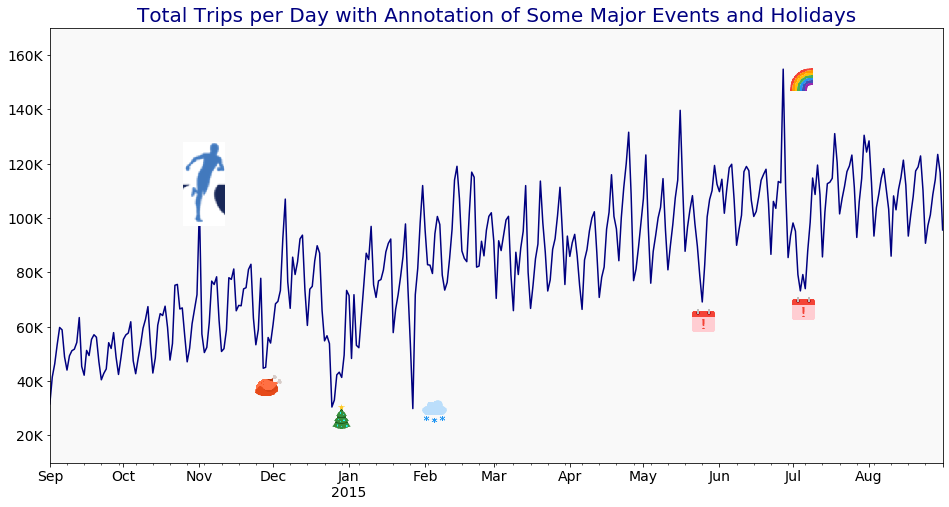

In [124]:
#Create a plot with the total number of trips per day, highlighting some changepoints associated with major holidays 
#and other weather and touristic/cultural events.

fig = plt.figure()

ax = byDate.plot(figsize = (16, 8), fontsize = 12, ylim = (10000, 170000), color = 'navy')

formatter = FuncFormatter(thousands_format)
ax.yaxis.set_major_formatter(formatter)
ax.set_facecolor('#F9F9F9') #make background color a lighter gray to better contrast with the icon's images.

plt.title('Total Trips per Day with Annotation of Some Major Events and Holidays', fontsize= 20, color='navy')
plt.tick_params(labelsize=14)
plt.xlabel('')


#Add icon to indicate snowstorm on the plot:
#NYC's mayor ordered the city under curfew, and public transportation system was shut down late on 1/26/15.
img1 = read_png('icons/Snow-48.png')
imagebox = OffsetImage(img1, zoom=0.6)
xy = ['2015-01-27', 25000] # (len(byDate[:'2015-01-27'])-1, byDate['2015-01-27'])

ab = AnnotationBbox(imagebox, xy, 
                    xybox=(22., 10.), #position from xy to lower left corner of box
                    xycoords='data', #will use data coordinates for x and y
                    boxcoords='offset points', #same idea as textcoords, in points from lower left corner
                    pad=0.1, frameon=False) #padding around the image
ax.add_artist(ab)


#Add icon to indicate Thanksgiving on the plot:
img2 = read_png('icons/Thanksgiving-48.png')
imagebox = OffsetImage(img2, zoom=0.6) 
xy = ['2014-11-27', 40000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Christmas on the plot:
img2 = read_png('icons/Christmas Tree-48.png')
imagebox = OffsetImage(img2, zoom=0.6) 
xy = ['2014-12-25', 25000] 
ab = AnnotationBbox(imagebox, xy, xybox=(10., 5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Memorial Day Holiday on the plot:
img3 = read_png('icons/Leave-48.png')
imagebox = OffsetImage(img3, zoom=0.6) 
xy = ['2015-05-25', 60000] 
ab = AnnotationBbox(imagebox, xy, xybox=(1., 5.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Pride Week on the plot:
#According to The Wall Street Journal, the Pride Parade was attended by 1.6 million people in 2015.
img4 = read_png('icons/Rainbow-48.png')
imagebox = OffsetImage(img4, zoom=0.6) 
xy = ['2015-06-27', 150000] 
ab = AnnotationBbox(imagebox, xy, xybox=(18., 2.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate Independence Day Holiday on the plot:
img5 = read_png('icons/Leave-48.png')
imagebox = OffsetImage(img5, zoom=0.6) 
xy = ['2015-07-03', 70000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., -10.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

#Add icon to indicate NYC Marathon event on the plot:
img5 = read_png('icons/Running-48.png')
imagebox = OffsetImage(img5, zoom=0.7) 
xy = ['2014-11-01', 110000] 
ab = AnnotationBbox(imagebox, xy, xybox=(5., 7.), xycoords='data', boxcoords='offset points', pad=0.1, frameon=False)
ax.add_artist(ab)

plt.show()
#plot_url = py.plot_mpl(fig)

## The effect of time on demand for Uber rides: distribution per hour, weekday, and month.

In [125]:
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

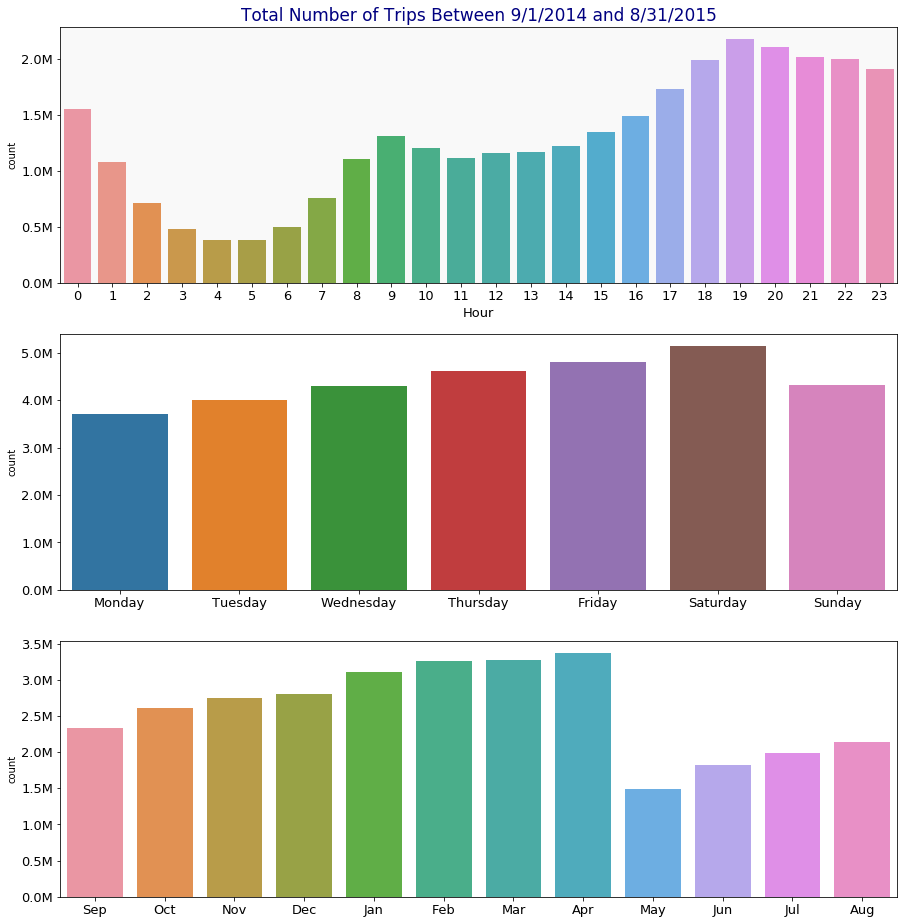

In [126]:
# Create plots comparing demand per different time categories:
fig = plt.figure(figsize = (15,16))
formatter = FuncFormatter(millions_format)

plt.subplot(3,1,1) #this plot could have a polar format, although I'm not sure it'd be a better viz.
ax1 = sns.countplot(df_viz.Hour, order = range(24))
ax1.yaxis.set_major_formatter(formatter)
ax1.set_facecolor("#F9F9F9")
plt.tick_params(labelsize=13)
plt.title('Total Number of Trips Between 9/1/2014 and 8/31/2015', fontsize=17, color='navy')
plt.xlabel('Hour', fontsize=13)

plt.subplot(3,1,2)
ax2 = sns.countplot(df_viz.Weekday, order = range(7))
ax2.set_xticklabels(weekday_labels)
ax2.yaxis.set_major_formatter(formatter)
plt.tick_params(labelsize=13)
plt.xlabel('')

plt.subplot(3,1,3) #same as the line plot but with less granularity, perhaps easier to visualize the MOM growth
ax3 = sns.countplot(df_viz.Month)
ax3.set_xticklabels(month_labels)
ax3.yaxis.set_major_formatter(formatter)
#plt.text(0, 3100000, 'Consistent growth in the number of trips from month to month!', color='navy', size=15)
plt.tick_params(labelsize=13)
plt.xlabel('')

#fig.subplots_adjust(hspace=.5)
plt.show()

## Estimated Monthly Base Revenue: how much was the NYC market worth in the period?

In [127]:
#Create dataframe with grouped revenue data:
byDateRev = df_viz.groupby('Month')['est_revenue'].sum()

In [128]:
#Estimate Uber's gross margin for the entire 1 year period based on 25% share of the base revenue.
sumRev = byDateRev.sum()
print ('${:,.0f}M'.format(sumRev * 1e-6), "Base Revenue   Uber's Base Gross Margin:", '${:,.0f}'.format(sumRev * .25))

$595M Base Revenue   Uber's Base Gross Margin: $148,757,755


In [129]:
#Estimated base gross margin based on information that average UberX fare in Sep 2014 was $27 (but it has dropped):
len(df_viz) * 27 * .25

208735400.25

In [130]:
byDateRev.head()

Month
1    4.145715e+07
2    4.725285e+07
3    5.215439e+07
4    5.409507e+07
5    6.153991e+07
Name: est_revenue, dtype: float64

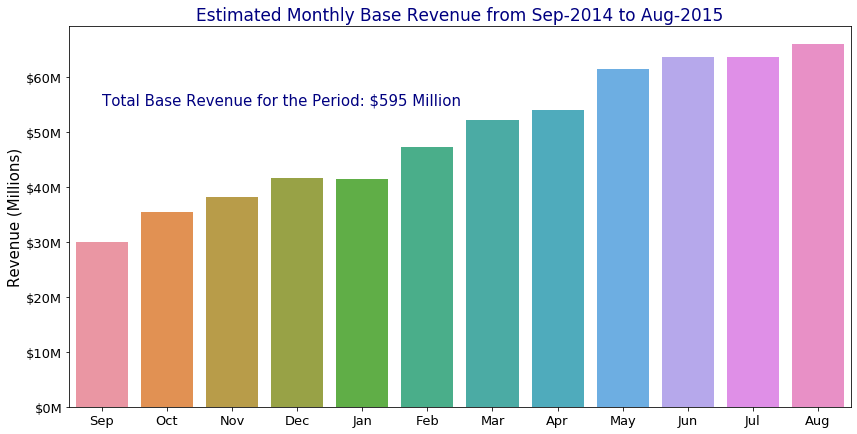

In [131]:
#Create chart showing total base revenue per month.
months_seq = [9,10,11,12,1,2,3,4,5,6,7,8]
formatter = FuncFormatter(millions_currency)

plt.figure(figsize = (14, 7))
ax = sns.barplot(byDateRev.index, byDateRev.values, order = months_seq)
ax.set_xticklabels(month_labels)
ax.yaxis.set_major_formatter(formatter)

font = {'color': 'navy', 'size': 15} #text parameters
plt.text(0, 55000000, 'Total Base Revenue for the Period: ${:,.0f} Million'.format(sumRev * 1e-6), 
         fontdict = font) #params: x, y, text, fontdict
plt.xlabel('')
plt.ylabel('Revenue (Millions)', fontsize = 15)
plt.tick_params(labelsize=13)
plt.title('Estimated Monthly Base Revenue from Sep-2014 to Aug-2015', fontsize = 17, color='navy')

plt.show()

In [132]:
#Mean fare from revenue estimate for the period: $19.24 (assumes all trips are Uber X)
df_viz.est_revenue.mean()

19.241869694747738

In [133]:
#Rough estimate of revenue share from Uber Pool from 12/1/2014 to 8/31/2015 (total of 25,634,526 trips):
rev = df_viz[(df_viz.pu_date >= datetime.date(2014, 12, 1)) & (df_viz.pu_date <= datetime.date(2015, 8, 31))]\
.est_revenue.mean() #$19.17 mean revenue

u_pool = rev * 0.75 * 1500000
u_pool #$21,565,512 estimated revenue

C:\Users\ighos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


21565512.055648196

In [134]:
u_pool/df_viz[(df_viz.pu_date >= datetime.date(2014, 12, 1)) & (df_viz.pu_date <= datetime.date(2015, 8, 31))]\
.est_revenue.sum() #Uber Pool represented only about 4% of the total revenue for the period between Dec/14 and Aug/15.

C:\Users\ighos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


0.04388612451814645

## Month over Month Base Revenue Growth: how fast has Uber grown in the period?

In [135]:
#Create dictionary with calculated month over month revenue percentage growth:
dict_growth = {}
for i in range(len(months_seq)):
    mo = months_seq[i]
    rev = byDateRev[mo]
    if mo == 9:
        growth_pct = 0
    elif mo == 1:
        growth_pct = ((rev/byDateRev[12]) - 1) * 100
    else:
        growth_pct = ((rev/byDateRev[mo - 1]) - 1) * 100
    print (month_labels[i], 'Revenue =', '${:,.0f}'.format(rev), 'Growth % = ', '{:.1f}'.format(growth_pct))
    dict_growth[month_labels[i]] = growth_pct

Sep Revenue = $29,932,282 Growth % =  0.0
Oct Revenue = $35,531,001 Growth % =  18.7
Nov Revenue = $38,170,687 Growth % =  7.4
Dec Revenue = $41,661,569 Growth % =  9.1
Jan Revenue = $41,457,151 Growth % =  -0.5
Feb Revenue = $47,252,852 Growth % =  14.0
Mar Revenue = $52,154,385 Growth % =  10.4
Apr Revenue = $54,095,066 Growth % =  3.7
May Revenue = $61,539,912 Growth % =  13.8
Jun Revenue = $63,667,666 Growth % =  3.5
Jul Revenue = $63,607,348 Growth % =  -0.1
Aug Revenue = $65,961,099 Growth % =  3.7


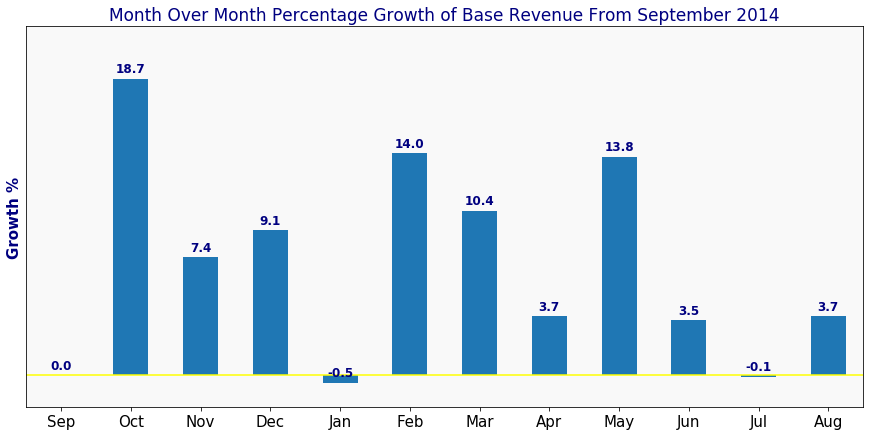

In [136]:
#Annotate Total Cummulative Growth for the Period

df_plt1 = pd.DataFrame(pd.Series(dict_growth), index = month_labels, columns = ['growth_pct'])

labels_list = df_plt1.growth_pct.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df_plt1.plot(kind = 'bar', figsize = (15,7), fontsize = 14, rot = 0, legend=False)#df_plt2[1:] to exclude Sep
ax.set_facecolor('#F9F9F9')
ax.get_yaxis().set_ticks([])
annotate_labels(ax, labels_list, **kwargs)

plt.axhline(0, color='yellow')
plt.title('Month Over Month Percentage Growth of Base Revenue From September 2014', 
          fontsize = 17, color='navy')
plt.ylabel('Growth %', fontsize = 15, weight='bold', color='navy')
plt.ylim(-2, 22)
plt.tick_params(labelsize=15)

plt.show()

Cummulative % Growth Over Period: 83.6883959768883


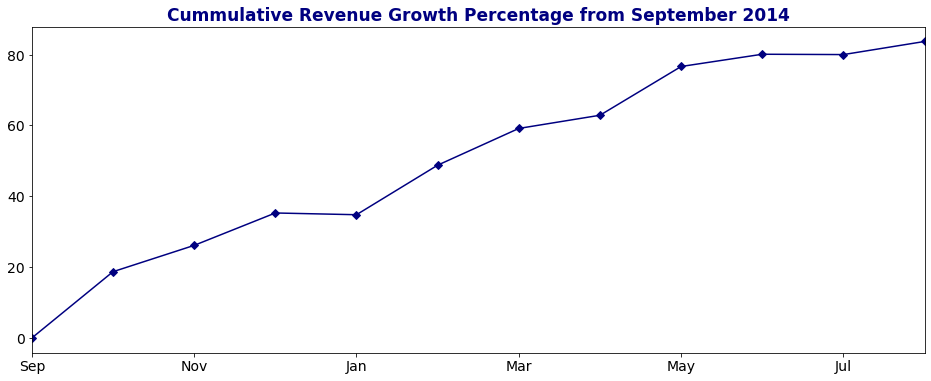

In [137]:
#Plot Cummulative Base Revenue Growth Over the Period
print ('Cummulative % Growth Over Period:', df_plt1.growth_pct.sum())

df_plt1.cumsum().plot(color = 'navy', marker = 'D', legend = False, figsize=(16, 6))
plt.title('Cummulative Revenue Growth Percentage from September 2014', fontsize=17, weight='bold', color='navy')
plt.tick_params(labelsize=14)
plt.show()

## Demand of Rides per Month - Peak versus Off-Peak Hours

In [138]:
def is_peak_hour(x):
    """ 
    Function that takes an array(x) with two integers representing 
    hour of the day and weekday, respectively, and
    returns 1 if it's peak hour as defined, 0 otherwise.
    """
    return 1 if x[0] in (7,8,9,16,17,18) and x[1] < 5 else 0 #total peak hour periods = 6h

In [139]:
df_viz['peak_hour'] = pd.Series(map(lambda x: is_peak_hour(x), df_viz.loc[:, ['Hour', 'Weekday']].values))

In [140]:
df_viz.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,pu_date,Year,Month,Day,Hour,Weekday,duration_min,trip_mph_average,est_revenue,peak_hour
0,252581,7C,6A,2014-09-01 09:00:00,4.25,2014-09-01,2014,9,1,9,0,15.183333,16.794731,15.301667,1.0
1,252582,7B,15,2014-09-01 18:00:00,10.17,2014-09-01,2014,9,1,18,0,34.083333,17.903178,32.276667,1.0
2,252583,11,2A,2014-09-01 17:00:00,4.02,2014-09-01,2014,9,1,17,0,17.100000,14.105263,15.570000,1.0
3,252584,3B,4A,2014-09-01 13:00:00,1.46,2014-09-01,2014,9,1,13,0,6.533333,13.408163,8.000000,0.0
4,252585,2A,10,2014-09-01 14:00:00,8.31,2014-09-01,2014,9,1,14,0,26.283333,18.970197,26.291667,0.0


C:\Users\ighos\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


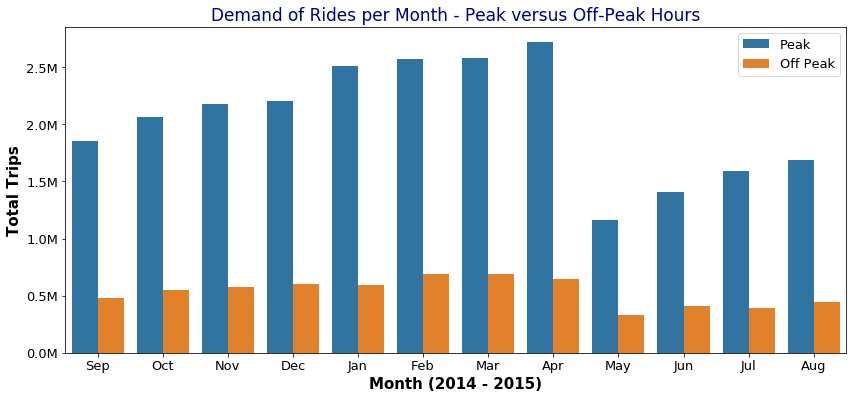

In [141]:
#Plot the total number of trips per month during peak hours and off-peak hours.
#Count for peak hours must represent more than 25% (6h) of the total rides to be more significant than non-peak hours.
plt.figure(figsize = (14, 6))
formatter = FuncFormatter(millions_format)

#to add labels and operate on data, use pivot instead of countplot directly with hue.
ax = sns.countplot(df_viz['Month'], hue = df_viz['peak_hour'])
ax.set_xticklabels(month_labels)
ax.yaxis.set_major_formatter(formatter)

handles, labels = ax.get_legend_handles_labels() #will cause the warning msg that can be ignored 
plt.legend(handles, labels=['Peak', 'Off Peak'], loc='best', fontsize=13)
plt.tick_params(labelsize=13)
plt.xlabel('Month (2014 - 2015)', fontsize = 15, weight='bold')
plt.ylabel('Total Trips', fontsize = 15, weight='bold')
plt.title('Demand of Rides per Month - Peak versus Off-Peak Hours', fontsize = 17, color='navy')
plt.show()